In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Data/air122.csv'

In [ ]:
import pandas as pd
# Specify an alternative encoding
encoding = 'ISO-8859-1'  # Try 'cp1252' if this doesn't work
# Read the CSV file with the specified encoding
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.shape

(144, 2)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame with a time series column and target values.
# Replace 'your_dataframe' and 'time_column' with your actual DataFrame and time column.
# Let's assume your time column is named 'timestamp' and your target column is 'value'.

# Load your time series data into a DataFrame
# your_dataframe = pd.read_csv('your_data.csv')

# Sort the DataFrame by the timestamp (if not already sorted)
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values(by='Month')
df = df.drop('Month', axis=1)
train_size= int(len(x)*0.7)
x =df[:len(x)-1]


y=df[1:]


In [ ]:
x_train.values

1/1 [==============================] - 0s 171ms/step
Epoch 1: Training Loss = 0.0030123896431177855, Testing Loss = 0.01246752217411995
Epoch 2: Training Loss = 0.0029274839907884598, Testing Loss = 0.01339746918529272
Epoch 3: Training Loss = 0.002800472779199481, Testing Loss = 0.013670321553945541
Epoch 4: Training Loss = 0.0028872599359601736, Testing Loss = 0.012837668880820274
Epoch 5: Training Loss = 0.0027992294635623693, Testing Loss = 0.01147175207734108
Epoch 6: Training Loss = 0.002851294819265604, Testing Loss = 0.012952981516718864
Epoch 7: Training Loss = 0.0029116778168827295, Testing Loss = 0.012460409663617611
Epoch 8: Training Loss = 0.0028096134774386883, Testing Loss = 0.011759639717638493
Epoch 9: Training Loss = 0.0029622619040310383, Testing Loss = 0.011915680021047592
Epoch 10: Training Loss = 0.0028801835142076015, Testing Loss = 0.012002994306385517
Epoch 11: Training Loss = 0.0028246522415429354, Testing Loss = 0.01252028252929449
Epoch 12: Training Loss = 0

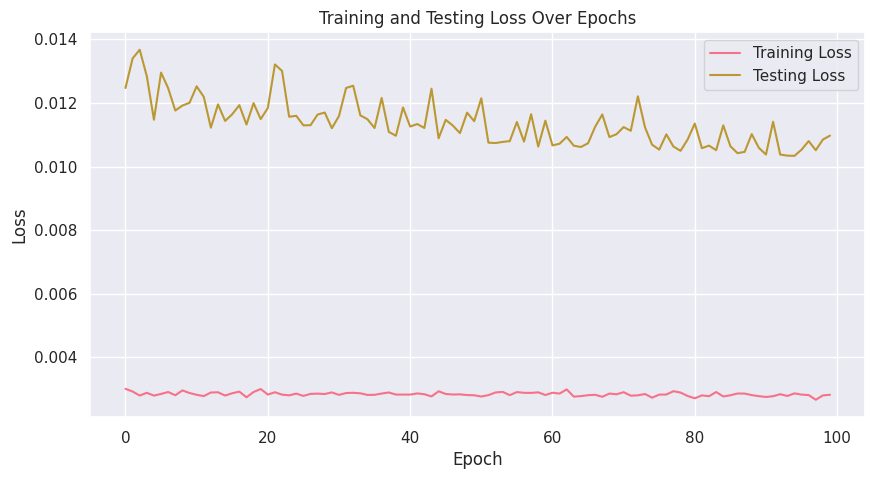

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt




# Preprocess the data (replace with your data preprocessing code)
df.columns = ['Passengers']
scaler = MinMaxScaler()
df['Passengers'] = scaler.fit_transform(df['Passengers'].values.reshape(-1, 1))
time_steps = 1
X, y = create_sequences(df, time_steps)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)  # Training without verbose output

# Track training and testing loss during training
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and original data to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)



# Access the training and testing history
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

# Print the loss at each epoch for training and testing
for epoch, (train_loss, test_loss) in enumerate(zip(training_loss, testing_loss), 1):
    print(f'Epoch {epoch}: Training Loss = {train_loss}, Testing Loss = {test_loss}')

# Visualize the training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()






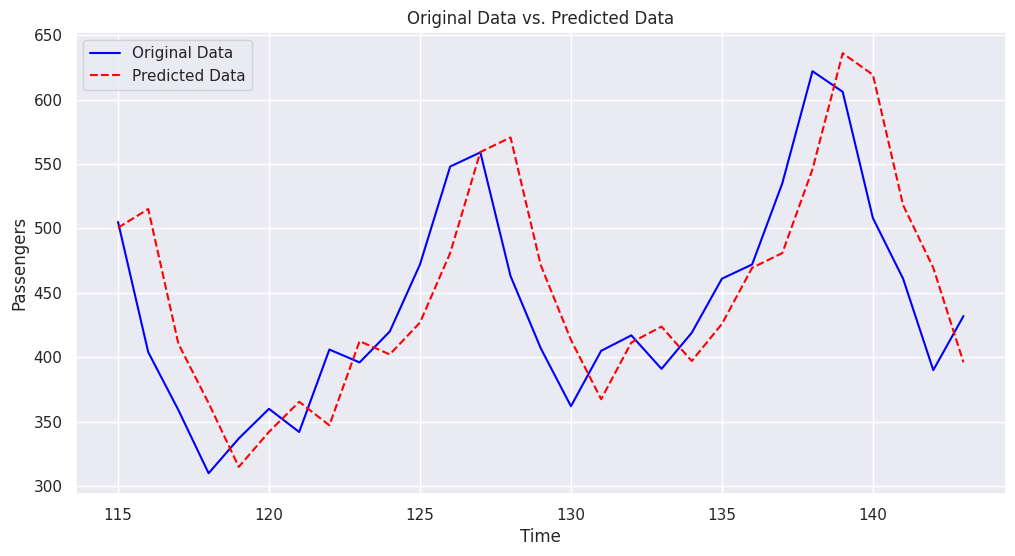

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a dark background style
sns.set_style("darkgrid")

# Define a custom color palette
custom_palette = sns.color_palette("husl")

# Set the custom color palette
sns.set_palette(custom_palette)

# Create a new Seaborn context with modified parameters
with sns.color_palette(custom_palette):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df.index[train_size + 1:], y=df1['Passengers'][train_size + 1:], label='Original Data', color='blue')
    sns.lineplot(x=df.index[train_size + 1:], y=y_pred.flatten(), label='Predicted Data', linestyle='--', color='red')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.title('Original Data vs. Predicted Data')
    plt.legend()
    plt.show()


AttributeError: ignored

In [ ]:
df1=pd.read_csv(file_path)

1/1 [==============================] - 1s 970ms/step
Epoch 1: Training Loss = 0.04500477761030197, Testing Loss = 0.11303143948316574
Epoch 2: Training Loss = 0.016439437866210938, Testing Loss = 0.07538208365440369
Epoch 3: Training Loss = 0.012705894187092781, Testing Loss = 0.03882191330194473
Epoch 4: Training Loss = 0.009769770316779613, Testing Loss = 0.025588955730199814
Epoch 5: Training Loss = 0.007551186252385378, Testing Loss = 0.019326435402035713
Epoch 6: Training Loss = 0.00519208237528801, Testing Loss = 0.016674857586622238
Epoch 7: Training Loss = 0.004054080229252577, Testing Loss = 0.012727916240692139
Epoch 8: Training Loss = 0.003407927230000496, Testing Loss = 0.010811414569616318
Epoch 9: Training Loss = 0.0030604286585003138, Testing Loss = 0.011312958784401417
Epoch 10: Training Loss = 0.003031745320186019, Testing Loss = 0.011628950014710426
Epoch 11: Training Loss = 0.00295148859731853, Testing Loss = 0.01267207507044077
Epoch 12: Training Loss = 0.0029808382

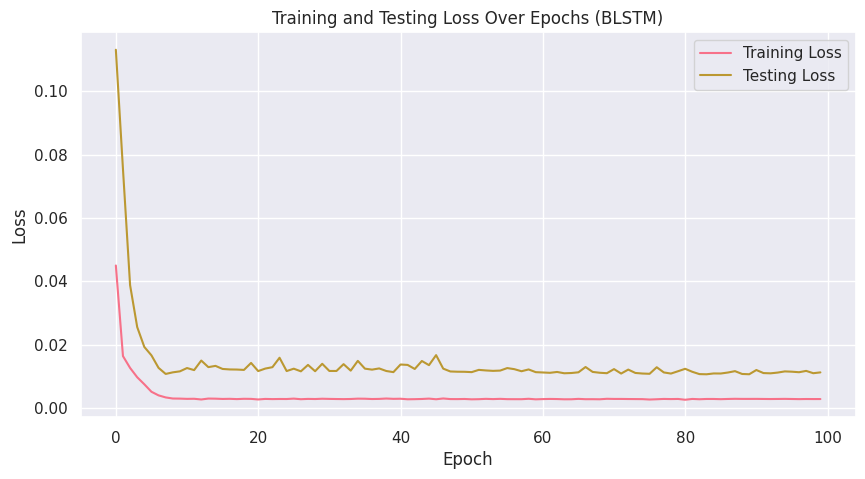

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data and created X_train, X_test, y_train, and y_test

# Build and train the Bidirectional LSTM (BLSTM) model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='relu'), input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Track training and testing loss during training
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and original data to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Access the training and testing history
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

# Print the loss at each epoch for training and testing
for epoch, (train_loss, test_loss) in enumerate(zip(training_loss, testing_loss), 1):
    print(f'Epoch {epoch}: Training Loss = {train_loss}, Testing Loss = {test_loss}')

# Visualize the training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs (BLSTM)')
plt.legend()
plt.show()


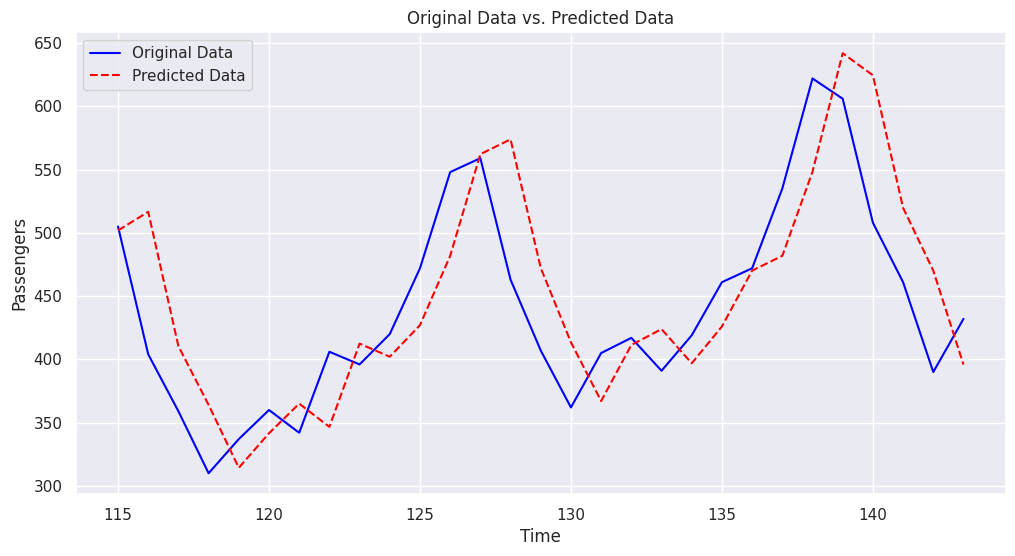

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a dark background style
sns.set_style("darkgrid")

# Define a custom color palette
custom_palette = sns.color_palette("husl")

# Set the custom color palette
sns.set_palette(custom_palette)

# Create a new Seaborn context with modified parameters
with sns.color_palette(custom_palette):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df.index[train_size + 1:], y=df1['Passengers'][train_size + 1:], label='Original Data', color='blue')
    sns.lineplot(x=df.index[train_size + 1:], y=y_pred.flatten(), label='Predicted Data', linestyle='--', color='red')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.title('Original Data vs. Predicted Data')
    plt.legend()
    plt.show()


1/1 [==============================] - 1s 776ms/step
Epoch 1: Training Loss = 0.05059283226728439, Testing Loss = 0.14623239636421204
Epoch 2: Training Loss = 0.020473619922995567, Testing Loss = 0.09813711792230606
Epoch 3: Training Loss = 0.017763905227184296, Testing Loss = 0.07703232765197754
Epoch 4: Training Loss = 0.01540283765643835, Testing Loss = 0.06449864059686661
Epoch 5: Training Loss = 0.012867524288594723, Testing Loss = 0.04709731042385101
Epoch 6: Training Loss = 0.010463098995387554, Testing Loss = 0.03957406431436539
Epoch 7: Training Loss = 0.008285393938422203, Testing Loss = 0.03706502541899681
Epoch 8: Training Loss = 0.006896364968270063, Testing Loss = 0.02144075185060501
Epoch 9: Training Loss = 0.005146528594195843, Testing Loss = 0.016908889636397362
Epoch 10: Training Loss = 0.004173618741333485, Testing Loss = 0.014961524866521358
Epoch 11: Training Loss = 0.0036069925408810377, Testing Loss = 0.010291089303791523
Epoch 12: Training Loss = 0.0032545928843

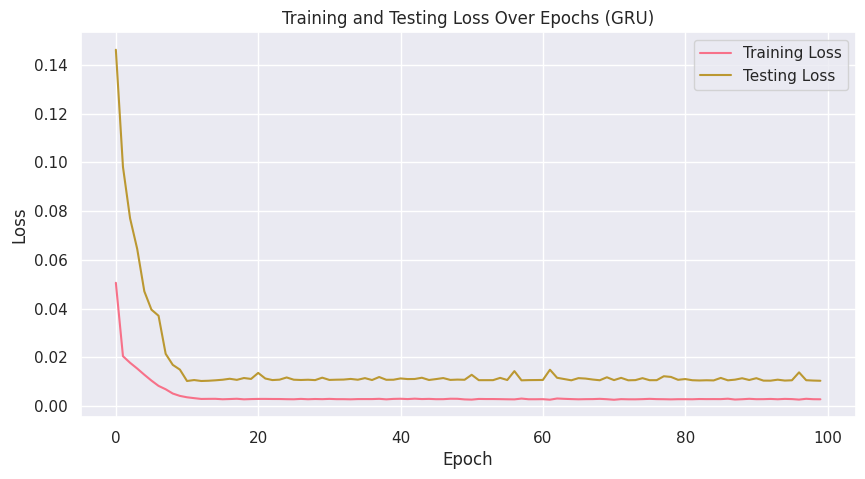

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data and created X_train, X_test, y_train, and y_test

# Build and train the GRU model
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Track training and testing loss during training
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and original data to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Access the training and testing history
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

# Print the loss at each epoch for training and testing
for epoch, (train_loss, test_loss) in enumerate(zip(training_loss, testing_loss), 1):
    print(f'Epoch {epoch}: Training Loss = {train_loss}, Testing Loss = {test_loss}')

# Visualize the training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs (GRU)')
plt.legend()
plt.show()


Epoch 1/50
10/10 [==============================] - 2s 19ms/step - loss: 0.1937
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0816
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0576
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0463
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0398
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0356
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0307
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0289
Epoch 9/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0271
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0251
Epoch 11/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 12/50
10/10 [==============================] - 1s 90ms/step - loss: 0.0216
Epoch 13/50
10/10 [============================

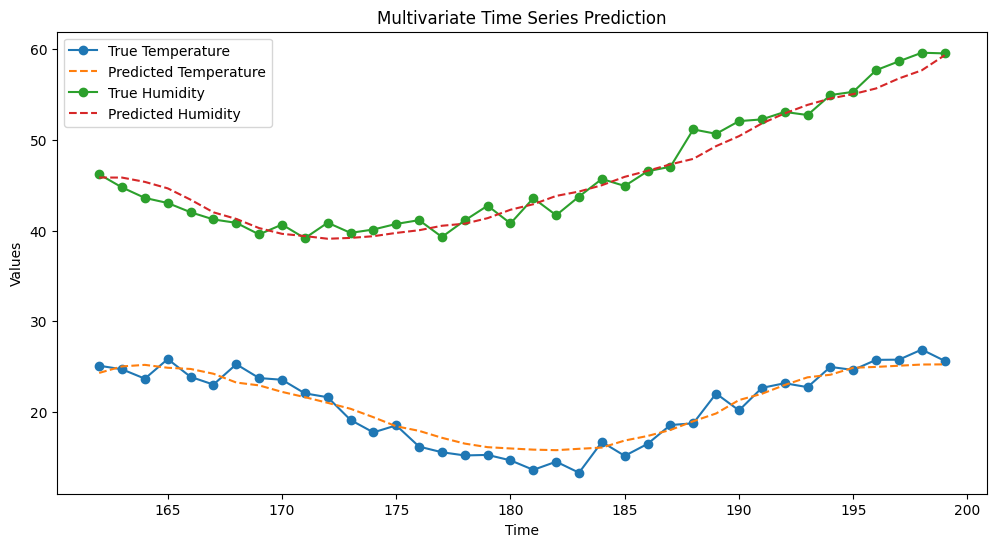

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate synthetic multivariate time series data
np.random.seed(0)
n = 200
time = np.arange(0, n)
temperature = 20 + 5 * np.sin(0.2 * time) + np.random.normal(0, 1, n)
humidity = 50 + 10 * np.sin(0.1 * time) + np.random.normal(0, 1, n)

# Create a DataFrame with the multivariate time series data
data = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity})

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define the number of time steps and create sequences
time_steps = 10
X, y = [], []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps])
    y.append(data_scaled[i+time_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=2))  # Output layer with two units for Temperature and Humidity
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(time[train_size+time_steps:], y_test_original[:, 0], label='True Temperature', marker='o')
plt.plot(time[train_size+time_steps:], y_pred_original[:, 0], label='Predicted Temperature', linestyle='--')
plt.plot(time[train_size+time_steps:], y_test_original[:, 1], label='True Humidity', marker='o')
plt.plot(time[train_size+time_steps:], y_pred_original[:, 1], label='Predicted Humidity', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Multivariate Time Series Prediction')
plt.legend()
plt.show()


In [ ]:
y_pred

array([[0.8104282 , 0.31065518],
       [0.8631388 , 0.31044403],
       [0.8757555 , 0.2901984 ],
       [0.8522971 , 0.25989503],
       [0.8425345 , 0.20678969],
       [0.80373544, 0.14755599],
       [0.73230225, 0.11659046],
       [0.709066  , 0.0735999 ],
       [0.6564159 , 0.0466695 ],
       [0.61374843, 0.03628393],
       [0.56738657, 0.02362571],
       [0.51926035, 0.02752841],
       [0.45082533, 0.03557793],
       [0.37709978, 0.05103237],
       [0.33992043, 0.0635639 ],
       [0.28365695, 0.08453548],
       [0.23648322, 0.09428408],
       [0.20743863, 0.12020686],
       [0.19695285, 0.15965411],
       [0.18748042, 0.18548582],
       [0.1831431 , 0.22443305],
       [0.19423094, 0.24492924],
       [0.20401548, 0.27462494],
       [0.26135445, 0.31396163],
       [0.2983097 , 0.34214196],
       [0.34736884, 0.37241948],
       [0.41785902, 0.39812663],
       [0.48119986, 0.4579315 ],
       [0.58998275, 0.504562  ],
       [0.6407137 , 0.5640549 ],
       [0.